In [1]:
pip install --upgrade seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [5]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipykernel_961/1690689035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(data['Age'].mean(), inplace=True)
/tmp/ipykernel_961/1690689035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [6]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [7]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


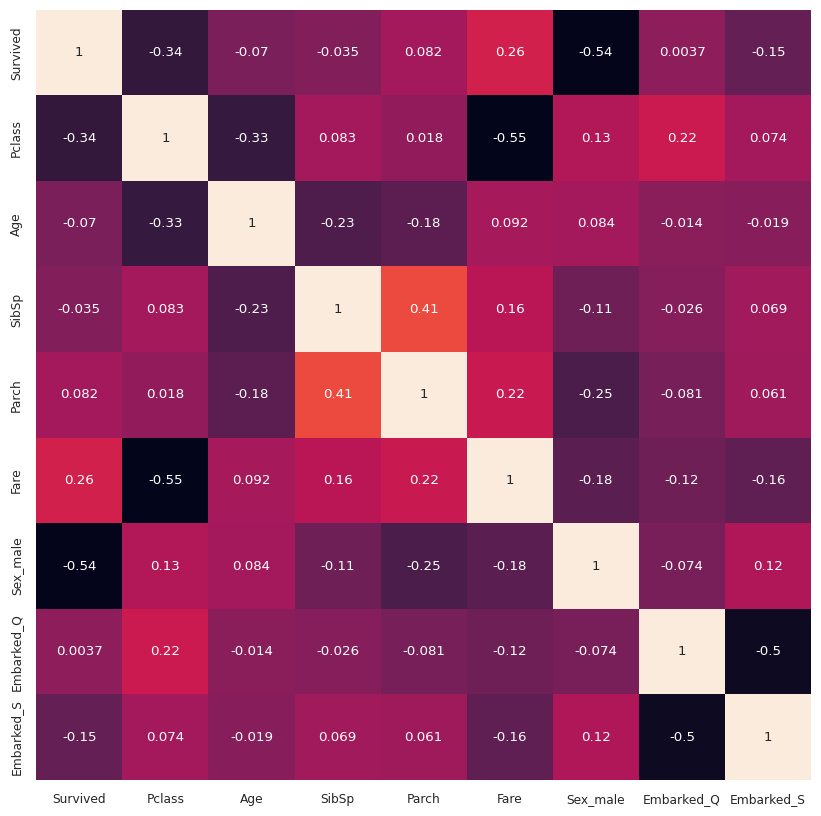

In [8]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [9]:
# 특징과 타겟 분리
X = data.drop('Survived', axis=1)
y = data['Survived']

In [10]:
feature_names = X.columns
print(feature_names)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [11]:
# 데이터 표준화
scaler = StandardScaler()
X_before = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_before, y,test_size=0.25,random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [14]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
print(pred_lr)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1
 1]

--- Logistic Regression Classifier ---
0.7937219730941704
[[116  23]
 [ 23  61]]


[[116  23]
 [ 23  61]]
0.7937219730941704
0.7937219730941704
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.73      0.73      0.73        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



<Axes: >

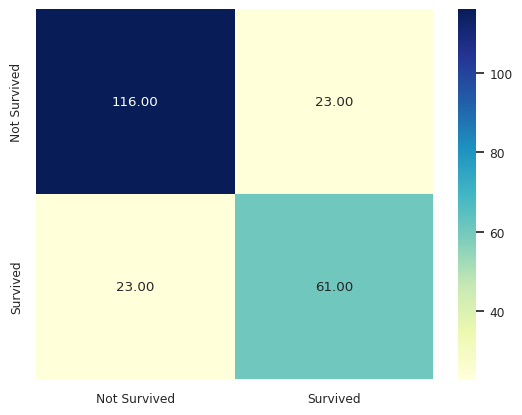

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

LABELS = ['Not Survived','Survived']
cm=confusion_matrix(y_test,pred_lr)
print(cm)
print(accuracy_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr, average='weighted'))
print(classification_report(y_test,pred_lr))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# GWO를 이용한 Feature Selection

In [16]:
def objective_function(selected_features):
    selected_indices = [i for i, val in enumerate(selected_features) if val > 0.5]
    if len(selected_indices) == 0:  # 아무 특성도 선택되지 않은 경우
        return 1.0  # 높은 오류 값 반환
    
    X_selected = X_before[:, selected_indices]
    model = LogisticRegression(max_iter=1000)
    scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    return 1 - scores.mean()  # GWO는 최소화를 하므로 1에서 평균 점수를 뺀 값을 반환

In [17]:
def GWO(objf, dim, SearchAgents_no, Max_iter):
    Alpha_pos = np.zeros(dim)
    Alpha_score = float("inf")
    
    Beta_pos = np.zeros(dim)
    Beta_score = float("inf")
    
    Delta_pos = np.zeros(dim)
    Delta_score = float("inf")

    Positions = np.random.randint(2, size=(SearchAgents_no, dim))
    
    Convergence_curve = np.zeros(Max_iter)
    
    print("GWO is optimizing \"" + objf.__name__ + "\"")
    timerStart = time.time()
    
    for l in range(0, Max_iter):
        for i in range(0, SearchAgents_no):
            fitness = objf(Positions[i, :])
            
            if fitness < Alpha_score:
                Alpha_score = fitness
                Alpha_pos = Positions[i, :].copy()
            
            if (fitness > Alpha_score and fitness < Beta_score):
                Beta_score = fitness
                Beta_pos = Positions[i, :].copy()
            
            if (fitness > Alpha_score and fitness > Beta_score and fitness < Delta_score):
                Delta_score = fitness
                Delta_pos = Positions[i, :].copy()
        
        a = 2 - l * ((2) / Max_iter)
        
        for i in range(0, SearchAgents_no):
            for j in range(dim):
                r1 = random.random()
                r2 = random.random()
                
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                
                D_alpha = abs(C1 * Alpha_pos[j] - Positions[i, j])
                X1 = Alpha_pos[j] - A1 * D_alpha
                
                r1 = random.random()
                r2 = random.random()
                
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                
                D_beta = abs(C2 * Beta_pos[j] - Positions[i, j])
                X2 = Beta_pos[j] - A2 * D_beta
                
                r1 = random.random()
                r2 = random.random()
                
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                
                D_delta = abs(C3 * Delta_pos[j] - Positions[i, j])
                X3 = Delta_pos[j] - A3 * D_delta
                
                Positions[i, j] = (X1 + X2 + X3) / 3 > 0.5  # 바이너리 선택을 위해 임계값 0.5 사용
        
        Convergence_curve[l] = Alpha_score
        
        if l % 1 == 0:
            print(['At iteration ' + str(l) + ' the best fitness is ' + str(Alpha_score)])
    
    timerEnd = time.time()
    print('Completed in', (timerEnd - timerStart))
    
    return Alpha_pos

# GWO 파라미터 설정
dim = X_before.shape[1]  # 특성 수
SearchAgents_no = 20  # 탐색 에이전트 수
Max_iter = 100  # 최대 반복 횟수

# 최적화 수행
best_features = GWO(objective_function, dim, SearchAgents_no, Max_iter)
selected_indices = [i for i, val in enumerate(best_features) if val > 0.5]
print("Selected features indices:", selected_indices)

GWO is optimizing "objective_function"
['At iteration 0 the best fitness is 0.20539828008285732']
['At iteration 1 the best fitness is 0.20539828008285732']
['At iteration 2 the best fitness is 0.20091017513024922']
['At iteration 3 the best fitness is 0.20091017513024922']
['At iteration 4 the best fitness is 0.20091017513024922']
['At iteration 5 the best fitness is 0.20091017513024922']
['At iteration 6 the best fitness is 0.20091017513024922']
['At iteration 7 the best fitness is 0.20091017513024922']
['At iteration 8 the best fitness is 0.20091017513024922']
['At iteration 9 the best fitness is 0.20091017513024922']
['At iteration 10 the best fitness is 0.20091017513024922']
['At iteration 11 the best fitness is 0.20091017513024922']
['At iteration 12 the best fitness is 0.20091017513024922']
['At iteration 13 the best fitness is 0.20091017513024922']
['At iteration 14 the best fitness is 0.20091017513024922']
['At iteration 15 the best fitness is 0.20091017513024922']
['At iterat

In [18]:
selected_feature_names = feature_names[selected_indices]
print(selected_feature_names)

Index(['Pclass', 'SibSp', 'Sex_male'], dtype='object')


# 선택된 Feature들만 사용하여 학습

In [19]:
X = X[['Pclass', 'SibSp', 'Sex_male']]

In [20]:
# 데이터 표준화
scaler = StandardScaler()
X_after = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_after, y,test_size=0.25,random_state=0)

In [22]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
print(pred_lr)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1]

--- Logistic Regression Classifier ---
0.7892376681614349
[[118  21]
 [ 26  58]]


[[118  21]
 [ 26  58]]
0.7892376681614349
0.7878669751147275
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       139
           1       0.73      0.69      0.71        84

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



<Axes: >

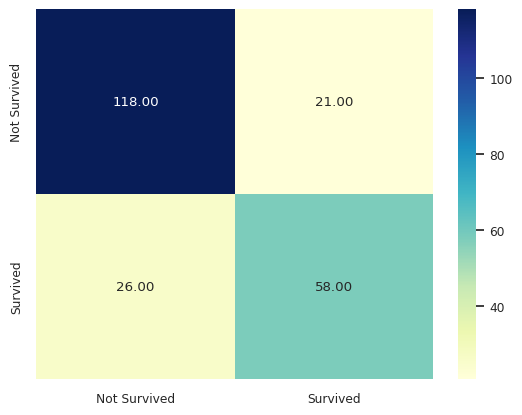

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

LABELS = ['Not Survived','Survived']
cm=confusion_matrix(y_test,pred_lr)
print(cm)
print(accuracy_score(y_test,pred_lr))
print(f1_score(y_test,pred_lr, average='weighted'))
print(classification_report(y_test,pred_lr))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')